# My Notebook on DSN Hackathon Challenge

In [1]:
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   #for plotting graph
%matplotlib inline 
#matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
#import pandas_profiling
import warnings   # to ignore warnings

#import all libraries and modules at the beginning of the code

#DATA LOADING

In [2]:
# loading the data
dsn_train = pd.read_csv("dsn_train.csv", parse_dates=["incident_date","policy_bind_date"])
dsn_test = pd.read_csv("dsn_test.csv",parse_dates=["incident_date","policy_bind_date"])

DATA PRE-PROCESSING

In [3]:
dsn_train.head() #Previewing the train dataset

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [4]:
dsn_test.head() #Previewing the test dataset

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


In [5]:
#import pandas_profiling 
#dsn_train.profile_report()

In [6]:
#Replacing ? with words
dsn_train['property_damage'] = dsn_train['property_damage'].str.replace('?','maybe')
dsn_train['police_report_available'] = dsn_train['police_report_available'].str.replace('?','misplaced')
#dsn_train['collision_type'] = dsn_train['collision_type'].str.replace('?','other')

C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
dsn_test['property_damage'] = dsn_train['property_damage'].str.replace('?','maybe')
dsn_test['police_report_available'] = dsn_train['police_report_available'].str.replace('?','misplaced')
dsn_test['collision_type'] = dsn_train['collision_type'].str.replace('?','other')

C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\OLADEJI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
dsn_train["date_diff"] = (dsn_train["incident_date"] - dsn_train["policy_bind_date"]).dt.days
dsn_test["date_diff"] = (dsn_test["incident_date"] - dsn_test["policy_bind_date"]).dt.days

In [9]:
def date_xtract(data):
    for date_column in ["incident_date","policy_bind_date"]:
        data[date_column+"day"] = data[date_column].dt.day
        data[date_column+"month"] = data[date_column].dt.month
        data[date_column+"year"] = data[date_column].dt.year
        data.drop(date_column, axis=1, inplace=True)
    return data

In [10]:
dsn_train["your_street"] = (dsn_train.incident_location.str.split(expand=True)[2])
dsn_test["your_street"] = (dsn_test.incident_location.str.split(expand=True)[2])

In [11]:
dsn_train.drop("incident_location", axis=1, inplace = True)
dsn_test.drop("incident_location", axis=1, inplace=True)

In [12]:
date_xtract(dsn_train)

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,_c39,total_claim_amount,date_diff,your_street,incident_dateday,incident_datemonth,incident_dateyear,policy_bind_dateday,policy_bind_datemonth,policy_bind_dateyear
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,NaN,14386.67,464,Drive,18,2,2015,11,11,2013
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,NaN,76440.00,3359,Drive,19,2,2015,9,12,2005
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,NaN,79560.00,4811,Lane,31,1,2015,29,11,2001
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,NaN,121680.00,849,Ave,5,2,2015,9,10,2012
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,NaN,80640.00,4019,Drive,3,1,2015,2,1,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Customer_106,464,61,FEMALE,Associate,prof-specialty,basketball,husband,0,-56400,...,NaN,106400.00,8864,Ridge,13,1,2015,7,10,1990
696,Customer_270,369,55,MALE,College,handlers-cleaners,camping,husband,55400,0,...,NaN,113733.33,652,Hwy,27,1,2015,15,4,2013
697,Customer_860,230,42,FEMALE,MD,adm-clerical,golf,own-child,0,-45300,...,NaN,78466.67,3734,Ave,6,2,2015,16,11,2004
698,Customer_435,102,28,MALE,MD,machine-op-inspct,reading,wife,55200,0,...,NaN,97866.67,5649,Ave,15,2,2015,29,8,1999


In [13]:
date_xtract(dsn_test)

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,auto_year,_c39,date_diff,your_street,incident_dateday,incident_datemonth,incident_dateyear,policy_bind_dateday,policy_bind_datemonth,policy_bind_dateyear
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,2003,NaN,182,Hwy,25,1,2015,27,7,2014
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,2006,NaN,2172,Lane,20,1,2015,8,2,2009
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,2007,NaN,8979,Ave,18,2,2015,20,7,1990
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,2012,NaN,8102,Ridge,14,2,2015,9,12,1992
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,2005,NaN,4327,Ave,12,2,2015,9,4,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Customer_468,225,37,FEMALE,High School,farming-fishing,yachting,not-in-family,49600,0,...,2015,NaN,5181,Drive,7,2,2015,1,12,2000
296,Customer_935,154,34,FEMALE,JD,priv-house-serv,cross-fit,husband,53100,-43900,...,2005,NaN,5592,Lane,26,1,2015,5,10,1999
297,Customer_428,167,36,FEMALE,Masters,exec-managerial,camping,other-relative,0,-38400,...,2008,NaN,7655,Hwy,19,1,2015,3,2,1994
298,Customer_7,165,37,MALE,Associate,tech-support,base-jumping,unmarried,0,0,...,2015,NaN,9155,Hwy,27,2,2015,3,2,1990


In [14]:
#Dropping columns not needed
dsn_train.drop(['Customer_ID',"_c39","collision_type"], axis=1,inplace=True)
#Dropping columns not needed
dsn_test.drop(['Customer_ID',"_c39","collision_type"], axis=1,inplace=True)

In [15]:
#Split data into features and target
X = dsn_train.drop(['total_claim_amount'], axis='columns')
y = dsn_train['total_claim_amount']

CATEGORICAL DATA CONVERSION 

In [16]:
#using get dummies function from pandas
X = pd.get_dummies(X)

In [17]:
X.head()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,your_street_Ave,your_street_Drive,your_street_Hwy,your_street_Lane,your_street_Ridge,your_street_St
0,239,41,51400,-6300,743092,1000,22,1,0,1325.44,...,0,0,0,0,0,1,0,0,0,0
1,108,31,0,0,492224,2000,14,1,0,1175.70,...,0,0,0,0,0,1,0,0,0,0
2,116,30,0,-35500,996253,500,8,3,0,951.46,...,0,0,0,0,0,0,0,1,0,0
3,8,21,0,0,355085,500,21,1,0,1021.90,...,0,0,0,0,1,0,0,0,0,0
4,161,38,60200,0,192524,2000,0,3,2,1133.85,...,0,0,0,0,0,1,0,0,0,0


In [18]:
#using get dummies function from pandas
Y= pd.get_dummies(dsn_test)

In [19]:
Y.head()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,...,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,your_street_Ave,your_street_Drive,your_street_Hwy,your_street_Lane,your_street_Ridge,your_street_St
0,5,26,31500,0,924318,2000,22,1,1,1137.02,...,0,0,0,0,0,0,1,0,0,0
1,160,33,61600,0,180286,1000,17,3,2,1422.78,...,0,0,0,0,0,0,0,1,0,0
2,385,51,0,-61000,178081,1000,14,3,1,976.37,...,0,0,0,0,1,0,0,0,0,0
3,446,57,42700,-64900,991480,2000,10,3,0,1373.21,...,0,1,0,0,0,0,0,0,1,0
4,84,29,0,-29900,630998,1000,6,1,2,1117.17,...,0,0,0,0,1,0,0,0,0,0


In [20]:
print(len(X.columns))
print(len(Y.columns))

168
168


In [21]:
lonely_people = [x for x in X.columns if x not in Y.columns] + [x for x in Y.columns if x not in X.columns]

In [22]:
lonely_people = [x for x in X.columns if x not in Y.columns]
X.drop(columns = [x for x in lonely_people if x in X.columns], axis = 1, inplace=True)
Y.drop(columns = [x for x in lonely_people if x in Y.columns], axis = 1, inplace=True)

In [23]:
my_problems = [x for x in Y.columns if x not in X.columns]

In [24]:
Y.drop(columns = my_problems, axis = 1, inplace=True)

In [25]:
print(len(X.columns))
print(len(Y.columns))

168
168


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 70)

MODELLING

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Columns: 168 entries, months_as_customer to your_street_St
dtypes: float64(1), int64(20), uint8(147)
memory usage: 215.5 KB


In [28]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [29]:
answers_lr = linearmodel.predict(Y)

In [30]:
linearmodel_prediction = linearmodel.predict(X_test)

In [31]:
linearmodel_prediction

array([ 61535.47781384,  85079.74160695,  98705.53299302,  64817.75007641,
       131033.2680884 ,  93832.05540895,  78822.12120336,  81502.9297452 ,
        99680.05939239,  67847.74699461,  82748.24008197,  89047.92291552,
       126586.30773795,   7275.46256858,  -8682.80145794,  75916.88447887,
        93412.69572109,  76873.56187534,  86535.91598648,  76875.79076028,
        23279.46416289,  99297.06778127,  89424.92121214,   9620.47878277,
        -3308.03539431,  80213.8995319 ,  69863.58963245,  55419.80865902,
       103569.74898672,  59206.46002454,  95990.72990716,  88560.58085054,
        58923.1924538 ,  81466.47268629,  92305.37038952,  85592.95854104,
        96092.86408955,  91700.38595921,  74988.02632427,  82255.85334218,
        12590.55395591,  10379.25194716,  91639.15580928,  71993.51450461,
        -5598.42830861,  85159.5713647 ,  94029.83462697,  73735.36499929,
        74698.97504264,  76873.87243277,  81255.354711  ,  94652.7535826 ,
        57076.20976961,  

In [32]:
MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)
MSE

483982586.92689633

In [33]:
np.sqrt(MSE)

21999.60424477896

RANDOM FOREST REGRESSOR

In [34]:
from sklearn.ensemble import RandomForestRegressor
randomodel = RandomForestRegressor(max_depth=4, random_state=70,)
randomodel.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, random_state=70)

In [35]:
answers = randomodel.predict(Y)

In [36]:
randomodel_prediction = randomodel.predict(X_test)
randomodel_prediction

array([79808.36165592, 84667.10166734, 82511.009966  , 81694.72809338,
       84337.72610485, 83063.53305223, 83619.04207815, 83524.98175012,
       87066.0066043 , 82835.54205617, 84258.40591268, 81995.23207004,
       85194.62222773,  7307.38092664,  9155.55473333, 82392.93600015,
       83820.48019997, 83385.10093475, 83151.52011533, 83610.98353205,
        8304.5718722 , 83393.89243606, 84552.57281109,  6219.26554176,
        7576.12118262, 84674.19536035, 83690.92680281, 83409.98719304,
       85045.46317537, 84603.53281218, 85378.50076005, 85479.61398084,
       83567.83441522, 83975.2782058 , 83877.69369225, 84330.83849495,
       83559.61120751, 84460.11695547, 83003.71396276, 86401.86725278,
        7505.7323563 ,  9075.37356938, 85492.26642994, 86107.15063153,
        7765.13693584, 86759.01900794, 83445.6618321 , 80191.07813094,
       82850.99490537, 82835.51180644, 83450.12500376, 84907.78931837,
       85773.85741693,  9303.05426099, 84083.96169087, 86681.76375767,
      

In [37]:
MSE = metrics.mean_squared_error(y_test, randomodel_prediction)
MSE

312739796.1474665

In [38]:
np.sqrt(MSE)

17684.45068831561

Text(0.5, 1.0, 'Random Forest Regressor features importance (top 10):')

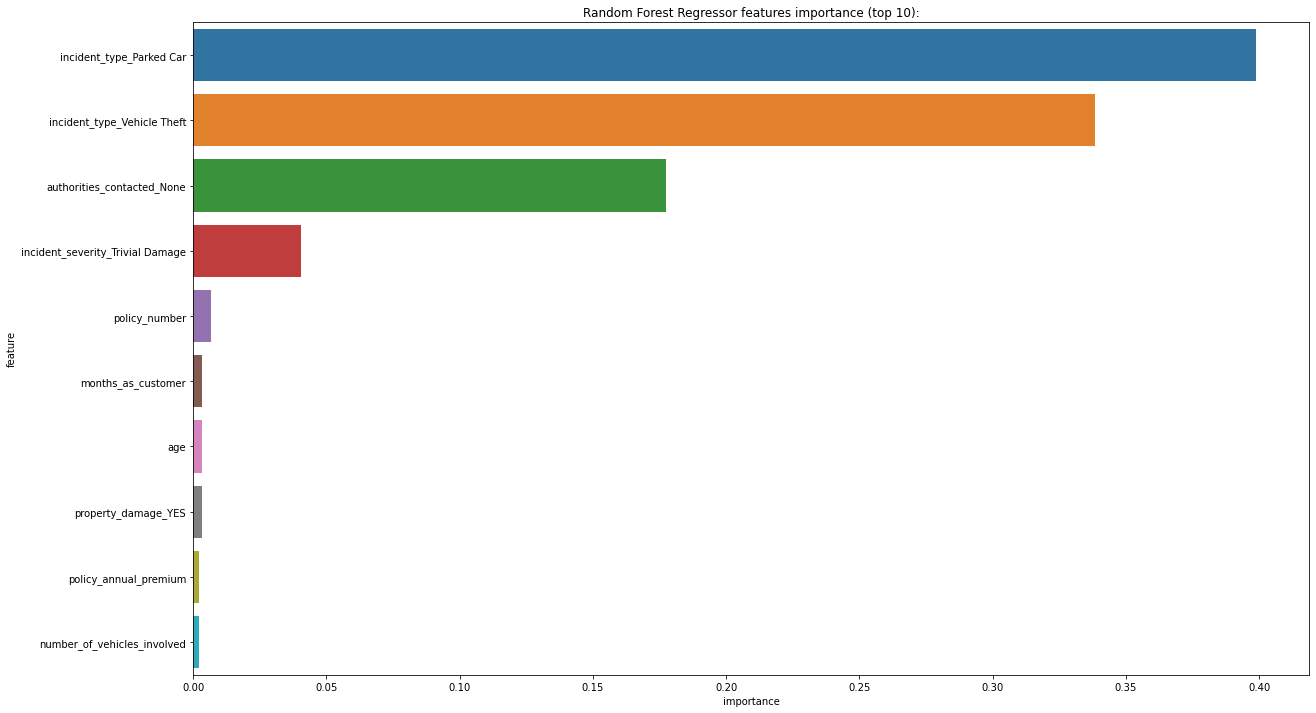

In [39]:
feature_importance_df = pd.DataFrame(randomodel.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(10))
plt.title('Random Forest Regressor features importance (top 10):')

EXTREME XGBOOST GRADIENT 

In [40]:
from xgboost import XGBRegressor
xgboostmodel = XGBRegressor(learning_rate=0.05, n_estimators=800, max_depth=4)
eval_set = [(X_test,y_test)]
xgboostmodel.fit(X_train,y_train, eval_set = eval_set, eval_metric = "rmse", verbose = 30, early_stopping_rounds=300)

[0]	validation_0-rmse:76719.92969
[30]	validation_0-rmse:25553.31055
[60]	validation_0-rmse:19287.37891
[90]	validation_0-rmse:18982.90234
[120]	validation_0-rmse:18973.41406
[150]	validation_0-rmse:19072.05078
[180]	validation_0-rmse:19204.63281
[210]	validation_0-rmse:19322.47461
[240]	validation_0-rmse:19390.95703
[270]	validation_0-rmse:19482.00000
[300]	validation_0-rmse:19587.87500
[330]	validation_0-rmse:19654.55078
[360]	validation_0-rmse:19729.09961
[386]	validation_0-rmse:19772.43359


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

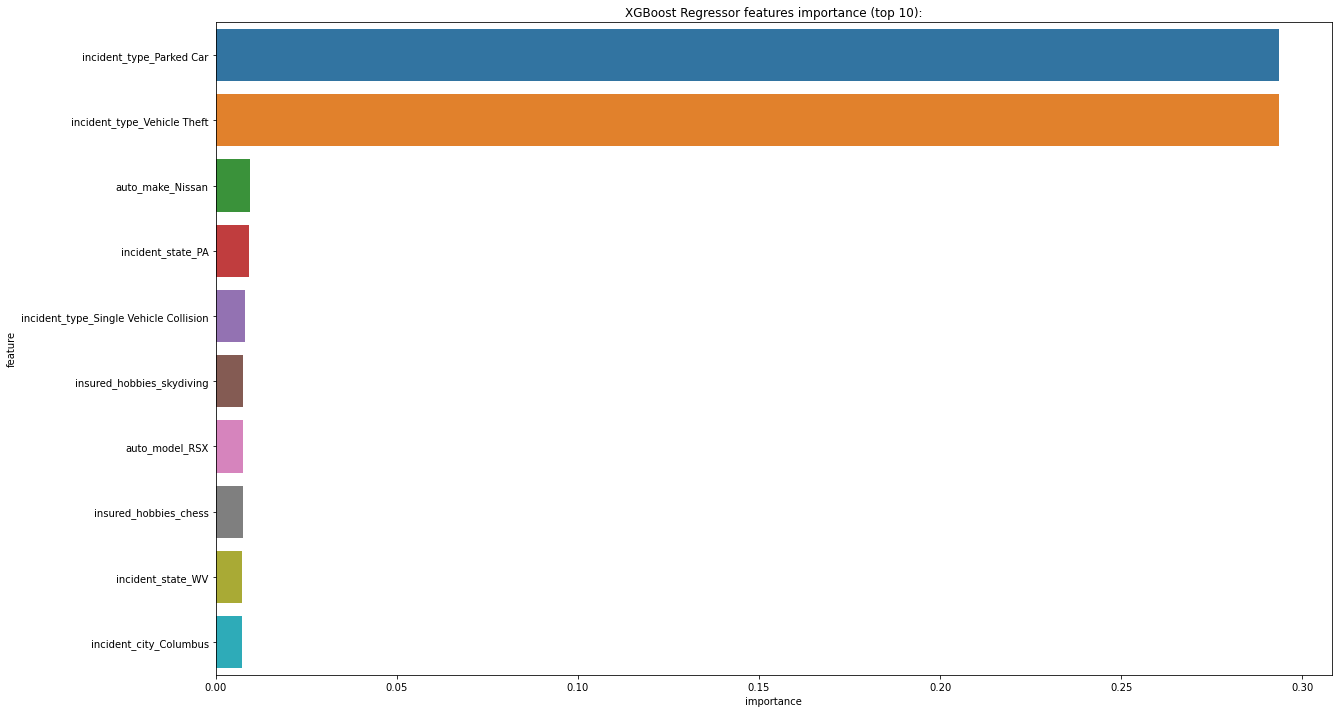

In [41]:
feature_importance_df = pd.DataFrame(xgboostmodel.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(10))
plt.title('XGBoost Regressor features importance (top 10):');

In [42]:
feature_importance_df.describe()

,importance
count,168.000000
mean,0.005952
std,0.031729
min,0.000000
25%,0.000940
50%,0.001954
75%,0.003491
max,0.293497


In [43]:
answers_xg = xgboostmodel.predict(Y)

C:\Users\OLADEJI\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [44]:
xgboostmodel_prediction = xgboostmodel.predict(X_test)

In [45]:
MSE = metrics.mean_squared_error(y_test, xgboostmodel_prediction)
MSE

356730450.409981

In [46]:
np.sqrt(MSE)

18887.30924218643

Light Gradient Boosting

In [47]:
from lightgbm import LGBMRegressor
lgbmmodel = LGBMRegressor(num_leaves=10,learning_rate=0.005,n_estimators=1000,max_depth=4,colsample_bytree=1, random_state=70)
eval_set = [(X_test,y_test)]
lgbmmodel.fit(X_train,y_train, eval_set = eval_set, eval_metric = "rmse", verbose = 50, early_stopping_rounds=300)

Training until validation scores don't improve for 300 rounds
[50]	valid_0's rmse: 30261.1	valid_0's l2: 9.15733e+08
[100]	valid_0's rmse: 26233.4	valid_0's l2: 6.88194e+08
[150]	valid_0's rmse: 23432.2	valid_0's l2: 5.49066e+08
[200]	valid_0's rmse: 21506.2	valid_0's l2: 4.62516e+08
[250]	valid_0's rmse: 20217.4	valid_0's l2: 4.08744e+08
[300]	valid_0's rmse: 19374.1	valid_0's l2: 3.75355e+08
[350]	valid_0's rmse: 18837.7	valid_0's l2: 3.5486e+08
[400]	valid_0's rmse: 18531.7	valid_0's l2: 3.43424e+08
[450]	valid_0's rmse: 18321.3	valid_0's l2: 3.35669e+08
[500]	valid_0's rmse: 18275.6	valid_0's l2: 3.33997e+08
[550]	valid_0's rmse: 18302.3	valid_0's l2: 3.34973e+08
[600]	valid_0's rmse: 18305.2	valid_0's l2: 3.35082e+08
[650]	valid_0's rmse: 18328.5	valid_0's l2: 3.35934e+08
[700]	valid_0's rmse: 18299.9	valid_0's l2: 3.34886e+08
[750]	valid_0's rmse: 18287.2	valid_0's l2: 3.34422e+08
Early stopping, best iteration is:
[487]	valid_0's rmse: 18259.9	valid_0's l2: 3.33424e+08


LGBMRegressor(colsample_bytree=1, learning_rate=0.005, max_depth=4,
              n_estimators=1000, num_leaves=10, random_state=70)

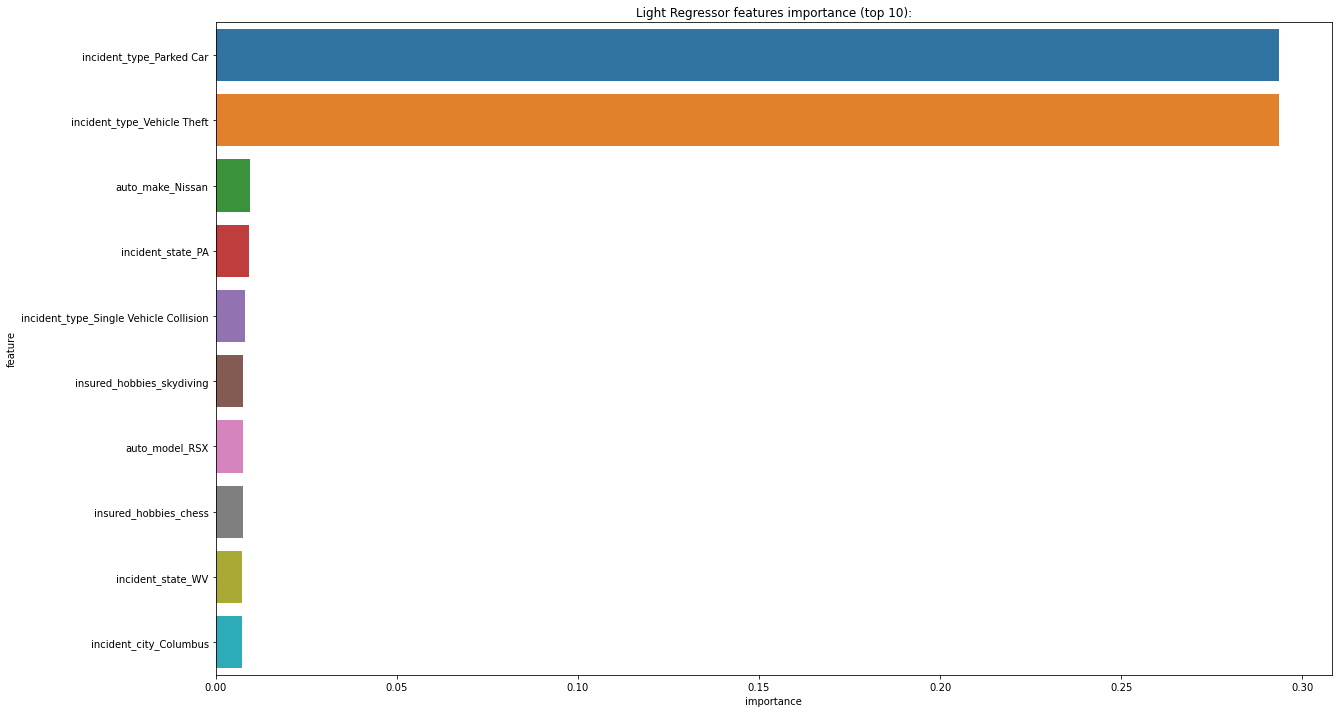

In [48]:
### feature_importance_df = pd.DataFrame(lgbmmodel.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(10))
plt.title('Light Regressor features importance (top 10):');

In [49]:
answers_lgb = lgbmmodel.predict(Y)

In [50]:
lgbmodel_prediction = lgbmmodel.predict(X_test)

In [51]:
MSE = metrics.mean_squared_error(y_test, lgbmodel_prediction)

In [52]:
np.sqrt(MSE)

18259.89478970471

DECISION TREE

In [53]:
submission = pd.read_csv("sample_submission _dsn.csv")
submission.head()

,Customer_ID,total_claim_amount
0,Customer_521,143059
1,Customer_737,42418
2,Customer_740,84649
3,Customer_660,150389
4,Customer_411,11139


In [54]:
submission.total_claim_amount = answers
submission.head()

,Customer_ID,total_claim_amount
0,Customer_521,83058.803698
1,Customer_737,80854.343700
2,Customer_740,83638.248561
3,Customer_660,84289.040627
4,Customer_411,7835.620239


In [55]:
submission[["Customer_ID","total_claim_amount"]].to_csv("Random_Forest_Submission.csv", index=False)

In [56]:
## Models Summary
#Deployment

In [58]:
#Save model to file
import pickle
pickle.dump(randomodel, open("randomodel.pickle.dat", "wb"))
print("Save model to: randomodel.pickle.dat")

Save model to: randomodel.pickle.dat


In [59]:
#load model from file
loaded_model = pickle.load(open("randomodel.pickle.dat", "rb"))
print("Loaded model from: randomodel.pickle.dat")

Loaded model from: randomodel.pickle.dat


In [60]:
#make predictions for test data
predictions = loaded_model.predict(X_test)

In [61]:
#evaluate predictions
from sklearn.metrics import r2_score
r2_score_metrics = r2_score(y_test, predictions)
r2_score_metrics

0.756646625740924